In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
import matplotlib.pylab as plt

from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
import joblib
import sklearn.metrics as metrics
import random
import lightgbm as lgb
random.seed(0)

In [101]:
data_frame = pd.read_csv('brown_matrix.txt', header=0, encoding='utf-8', sep = '\t')

In [102]:
data_frame

,SLC30A2,TFAP2A,GLDC,FDX1,ART4,LYPD3,SYT5,GCM1,FAM25A,PSG6,PSG9,NLRP7,SLC18A3,SLC27A6,MYPN,group
0,0.0,0.000000,0.0,0.693147,0.0,0.000000,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,2
1,0.0,0.693147,0.0,0.693147,0.0,0.000000,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,2
2,0.0,0.000000,0.0,0.693147,0.0,0.000000,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,2
3,0.0,0.000000,0.0,0.693147,0.0,0.000000,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,2
4,0.0,0.000000,0.0,0.693147,0.0,0.000000,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5943,0.0,0.000000,0.0,0.693147,0.0,0.000000,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,2
5944,0.0,0.000000,0.0,0.693147,0.0,0.000000,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,2
5945,0.0,0.000000,0.0,0.693147,0.0,0.000000,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,2
5946,0.0,0.000000,0.0,0.693147,0.0,0.000000,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,2


In [103]:
# 划分训练集和测试集
x = data_frame.iloc[:, :-1].values
y = data_frame.iloc[:, -1].values

In [104]:
x

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.69314718, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [105]:
y

array([2, 2, 2, ..., 2, 2, 2])

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [107]:
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.33, random_state=1)

In [108]:
x_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.69314718, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.69314718, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [109]:
x_test

array([[0.        , 0.69314718, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.69314718, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [110]:
x_val

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.69314718, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.69314718, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [111]:
# parameters = {'max_depth': [15, 20, 25, 30, 35],
#               'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15],
#               'feature_fraction': [0.6, 0.7, 0.8, 0.9, 0.95],
#               'bagging_fraction': [0.6, 0.7, 0.8, 0.9, 0.95],
#               'bagging_freq': [2, 4, 5, 6, 8],
#               'lambda_l1': [0, 0.1, 0.4, 0.5, 0.6],
#               'lambda_l2': [0, 10, 15, 35, 40],
#               'cat_smooth': [1, 10, 15, 20, 35]}

# gbm = LGBMClassifier(boosting_type='gbdt',
#                          objective = 'binary',
#                          metric = 'auc',
#                          verbose = 0,
#                          max_depth = 0,
#                          learning_rate = 0.02,
#                          num_leaves = 10,
#                          max_bin = 5,
#                          min_data_in_leaf = 1,
#                          feature_fraction=0.9,
#                          bagging_fraction= 0.55,
#                          bagging_freq= 65,
#                          lambda_l1= 0.5,
#                          lambda_l2= 1e-5,
#                          cat_smooth = 1)

In [112]:
# gbm = GridSearchCV(gbm, param_grid=parameters, scoring='accuracy', cv=3)
# gbm.fit(x_train, y_train)

In [113]:
gbm = LGBMClassifier(num_leaves=15, learning_rate=0.05, n_estimators=20)
gbm.fit(x_train, y_train, eval_set=[(x_test, y_test)], early_stopping_rounds=5)

[1]	valid_0's binary_logloss: 0.606329
[2]	valid_0's binary_logloss: 0.602763
[3]	valid_0's binary_logloss: 0.599546
[4]	valid_0's binary_logloss: 0.596634
[5]	valid_0's binary_logloss: 0.593993
[6]	valid_0's binary_logloss: 0.591594
[7]	valid_0's binary_logloss: 0.58941
[8]	valid_0's binary_logloss: 0.58742
[9]	valid_0's binary_logloss: 0.585605
[10]	valid_0's binary_logloss: 0.583948
[11]	valid_0's binary_logloss: 0.582435
[12]	valid_0's binary_logloss: 0.581052
[13]	valid_0's binary_logloss: 0.579787
[14]	valid_0's binary_logloss: 0.57863
[15]	valid_0's binary_logloss: 0.577571
[16]	valid_0's binary_logloss: 0.576602
[17]	valid_0's binary_logloss: 0.575715
[18]	valid_0's binary_logloss: 0.574903
[19]	valid_0's binary_logloss: 0.574158
[20]	valid_0's binary_logloss: 0.573477


/Users/liuhonghao/.conda/envs/machine/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier(learning_rate=0.05, n_estimators=20, num_leaves=15)

In [114]:
# 模型存储
joblib.dump(gbm, 'brown_loan_model.pkl')
# 模型加载
gbm = joblib.load('brown_loan_model.pkl')

In [115]:
# 模型预测
y_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration_)

# 模型评估
print('The accuracy of prediction is:', accuracy_score(y_test, y_pred))

# 特征重要度
print('Feature importances:', list(gbm.feature_importances_))

The accuracy of prediction is: 0.7079497907949791
Feature importances: [0, 40, 0, 100, 0, 40, 20, 0, 0, 0, 0, 0, 0, 0, 0]


<Figure size 864x432 with 0 Axes>

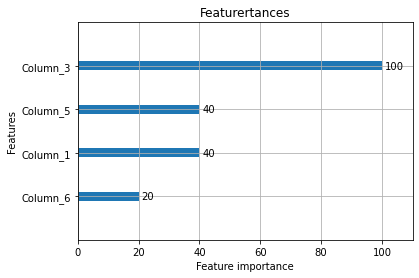

In [116]:
plt.figure(figsize=(12,6))
lgb.plot_importance(gbm, max_num_features=30)
plt.title("Featurertances")
plt.show()

In [117]:
booster = gbm.booster_
importance = booster.feature_importance(importance_type='split')
feature_name = booster.feature_name()

feature_importance = pd.DataFrame({
  'feature_name':feature_name,'importance':importance} )

In [118]:
feature_importance

,feature_name,importance
0,Column_0,0
1,Column_1,40
2,Column_2,0
3,Column_3,100
4,Column_4,0
5,Column_5,40
6,Column_6,20
7,Column_7,0
8,Column_8,0
9,Column_9,0


In [119]:
feature_importance.to_csv('brown_feature_importance.csv',index=False)

In [120]:
gbm_y_pre = gbm.predict(x_train) # 分类的类别
gbm_y_proba = gbm.predict_proba(x_train) # 分类的概率值

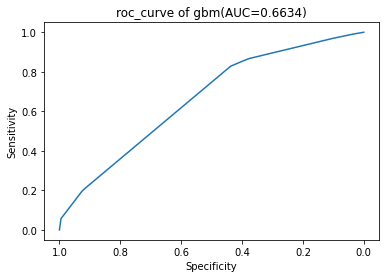

In [121]:
gbm_auc = roc_auc_score(y_train, gbm_y_proba[:, 1])  # 计算auc
gbm_fpr, gbm_tpr, gbm_threasholds = roc_curve(y_train, gbm_y_proba[:, 1], pos_label=2)  # 计算ROC的值
plt.title("roc_curve of %s(AUC=%.4f)" % ('gbm', gbm_auc))
plt.xlabel('Specificity')  # specificity = 1 - np.array(gbm_fpr))
plt.ylabel('Sensitivity')  # sensitivity = gbm_tpr
plt.plot(list(1-np.array(gbm_fpr)), gbm_tpr)
plt.gca().invert_xaxis()  # 将X轴反转
plt.show()

In [122]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, gbm_y_proba[:,1], pos_label=2)
roc_auc = metrics.auc(fpr,tpr)

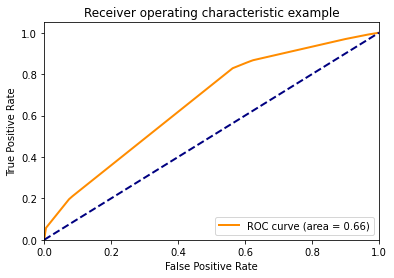

In [123]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.savefig('brown_auc_roc_train.pdf')
plt.show()

train_ks =  0.21942248572683354
train_auc =  0.6453324000878349
test_ks =  0.2760975511923146
test_auc =  0.6592343381266589


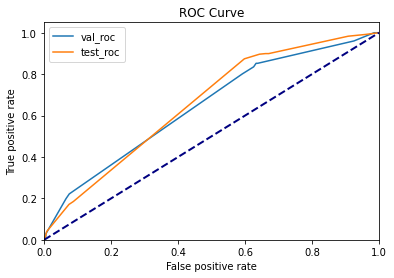

In [124]:
def roc_auc_plot(gbm,x_train,y_train,x_test, y_test):
    train_auc = roc_auc_score(y_train,gbm.predict_proba(x_train)[:,1])
    train_fpr, train_tpr, _ = roc_curve(y_train,gbm.predict_proba(x_train)[:,1], pos_label=2)
    train_ks = abs(train_fpr-train_tpr).max()
    print('train_ks = ', train_ks)
    print('train_auc = ', train_auc)
    
    test_auc = roc_auc_score(y_test,gbm.predict_proba(x_test)[:,1])
    test_fpr, test_tpr, _ = roc_curve(y_test,gbm.predict_proba(x_test)[:,1], pos_label=2)
    test_ks = abs(test_fpr-test_tpr).max()
    print('test_ks = ', test_ks)
    print('test_auc = ', test_auc)
    
    from matplotlib import pyplot as plt
    plt.plot(train_fpr,train_tpr,label = 'val_roc')
    plt.plot(test_fpr,test_tpr,label = 'test_roc')
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC Curve')
    plt.legend(loc = 'best')
    plt.savefig('brown_auc_roc.pdf')
    plt.show()

roc_auc_plot(gbm ,x_val,y_val,x_test, y_test)